In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print(df.shape)

(1338, 7)


In [7]:
smoker = df["smoker"]
smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

<Axes: xlabel='age', ylabel='Count'>

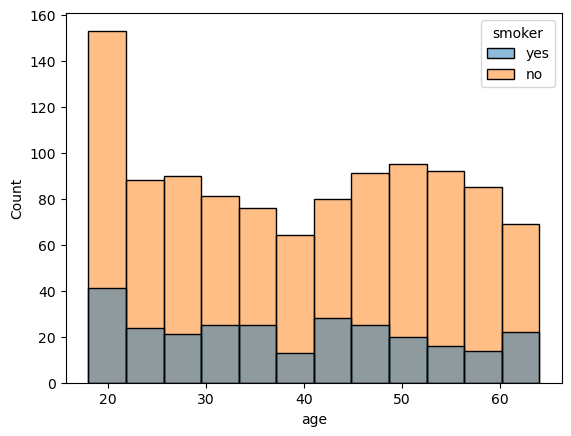

In [8]:
sns.histplot(data=df,x="age",hue="smoker",multiple="layer")

Insight

here we can observe that at the age of 18 to 21 are more number of people smoking 

In [17]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='smoker', ylabel='Count'>

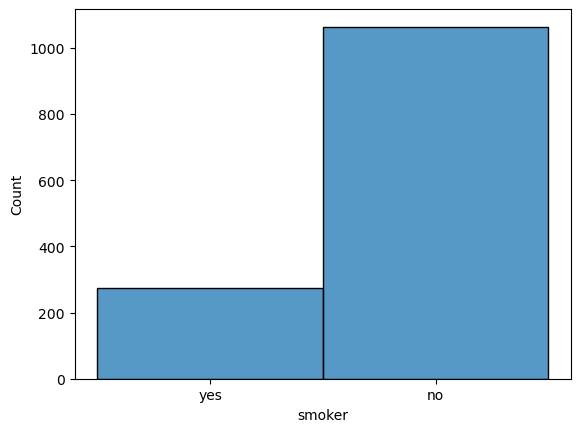

In [10]:
sns.histplot(data=df,x="smoker")

<Axes: xlabel='bmi', ylabel='Count'>

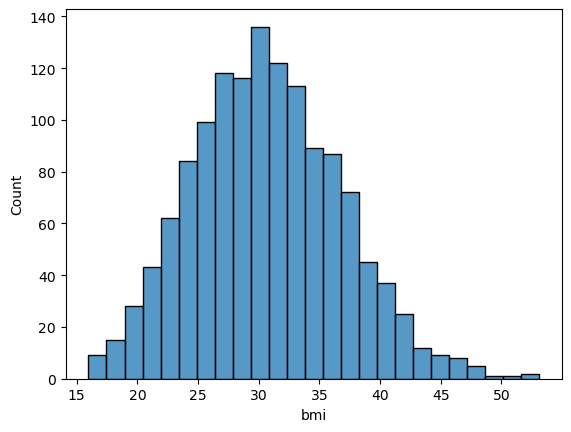

In [11]:
sns.histplot(data=df,x='bmi')

number of obese people are more

<Axes: xlabel='age', ylabel='bmi'>

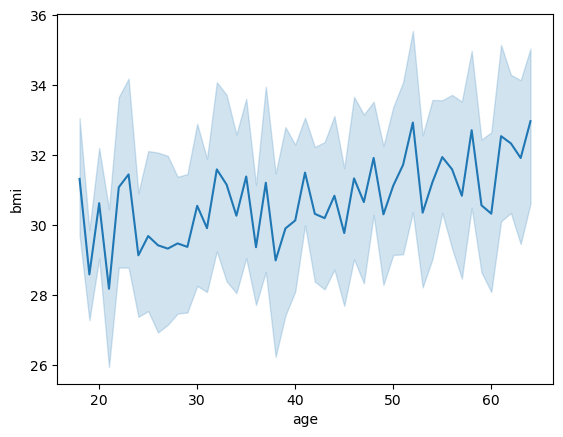

In [12]:
sns.lineplot(data=df,x="age",y='bmi')

The number of obese people are more above the age 50

<Axes: xlabel='age', ylabel='bmi'>

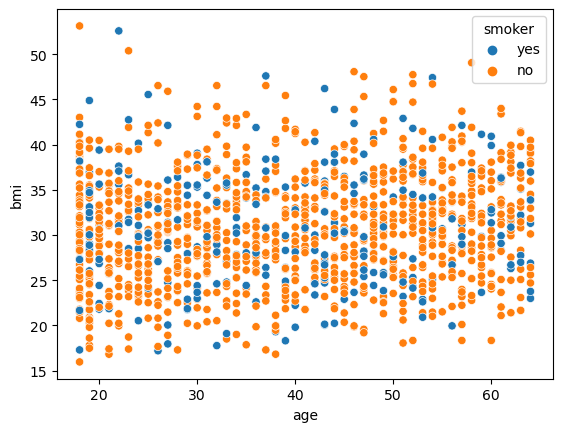

In [13]:
sns.scatterplot(data=df,x='age',y='bmi',hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

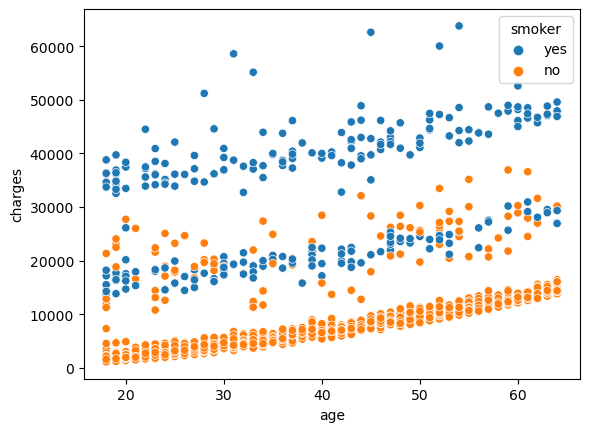

In [14]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

.people who smoke with age above 40 have heigher charges

Data preprocessing

In [15]:
X=df.drop("charges",axis = 1)
y=df["charges"]

converting categorical data into numberical using one hot encoding 

In [16]:
X=pd.get_dummies(X,columns=["sex","smoker","region"],drop_first=True) 

Dividing the dataset into train and test using sklearn traain_test_split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [23]:
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [47]:
ridge= Ridge()
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
result_ridge=ridge.score(X_train,y_train),ridge.score(X_test,y_test),cross_val_score(ridge,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Ridge model is",result_ridge)


Cross validated score for Ridge model is (0.7378347617653311, 0.7774600895563587, 0.7468670519387428, 6209.745136419883, 5684.389228792396)


In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [49]:
gp =GaussianProcessRegressor()
gp.fit(X_train,y_train)
y_train_pred=gp.predict(X_train)
y_test_pred=gp.predict(X_test)
result_gp=gp.score(X_train,y_train),gp.score(X_test,y_test),cross_val_score(gp,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for gaussian Process modedl model is",result_gp)

Cross validated score for gaussian Process modedl model is (0.9986693373529003, -0.28061069478156564, -0.2501842317593306, 442.40518272314995, 13636.04468050739)


In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)
result_dt=dt.score(X_train,y_train),dt.score(X_test,y_test),cross_val_score(dt,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for DT Regressor model is",result_dt)

Cross validated score for DT Regressor model is (0.9986693373529103, 0.710580503498329, 0.7014287910603659, 442.405182721486, 6482.518206741594)


In [54]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
y_train_pred=ab.predict(X_train)
y_test_pred=ab.predict(X_test)
y_test_pred_ab=ab.predict(X_test)
result_ab=ab.score(X_train,y_train),ab.score(X_test,y_test),cross_val_score(gb,X,y,cv=5).mean(),np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Cross validated score for Adaboost Regressor model is",result_ab)

Cross validated score for Adaboost Regressor model is (0.8222883846414971, 0.8431215407186875, 0.855004148408381, 5112.62724803402, 4772.671147367491)
